### Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pokemon = pd.read_csv('pokemon.csv', encoding='latin1')	# Ensures special characters are read correctly
combat = pd.read_csv('combats.csv', encoding='latin1')

# Normalize numeric values
names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
# Equivalent to using MinMaxScaler()
for col in names:
    pokemon[col] = (pokemon[col] - pokemon[col].min()) / (pokemon[col].max() - pokemon[col].min()) 

# Performs one hot encoding on the 'Type 1' column
pokemon = pd.get_dummies(pokemon, columns=['Type 1', ], dtype=int)

#Dropping Features and encoding True/False
pokemon = pokemon.drop('Name', axis=1)
pokemon = pokemon.drop('Type 2', axis=1) #Dropping type2 to reduce dimensionality of the data
pokemon = pokemon.drop('Generation', axis=1)

# To convert 'Legendary' column from boolean to integer type
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

# Sets label
y = combat['Winner']
combat=combat.drop('Winner', axis=1)


In [2]:
# Encode y as true or false. True if the first pokemon wins and false if the second pokemon wins.
for i in range(len(combat)):
    if y[i] == combat['First_pokemon'][i]:
        y[i]=1
    else:
        y[i]=0

In [3]:
# Merge combat data with pokemon data for First_pokemon
cols = pokemon.drop('#', axis=1).columns
merged1 = combat.merge(pokemon, left_on='First_pokemon', right_on='#', how='left')
merged1 = merged1.drop(columns=['#'])
merged1.columns = ['First_pokemon', 'Second_pokemon'] + [col + '1' for col in cols]

# Merge with pokemon data for Second_pokemon
merged2 = merged1.merge(pokemon, left_on='Second_pokemon', right_on='#', how='left')
merged2 = merged2.drop(columns=['#', 'First_pokemon', 'Second_pokemon'])
merged2.columns = merged1.columns.tolist()[2:] + [col + '2' for col in cols]

# Final DataFrame where each row represents a single match between two Pokémon
df = merged2
df.head()


,HP1,Attack1,Defense1,Sp. Atk1,Sp. Def1,Speed1,Legendary1,Type 1_Bug1,Type 1_Dark1,Type 1_Dragon1,...,Type 1_Ghost2,Type 1_Grass2,Type 1_Ground2,Type 1_Ice2,Type 1_Normal2,Type 1_Poison2,Type 1_Psychic2,Type 1_Rock2,Type 1_Steel2,Type 1_Water2
0,0.192913,0.318919,0.200000,0.190217,0.142857,0.205714,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.354331,0.459459,0.297778,0.434783,0.519048,0.588571,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.212598,0.189189,0.355556,0.380435,0.404762,0.200000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.153543,0.189189,0.155556,0.326087,0.095238,0.085714,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.271654,0.297297,0.533333,0.570652,0.238095,0.285714,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Implementing a Support Vector Classifier (SVC) Model
- Based on the Support Vector Machine (SVM) algorithm
- Good for when you need high accuracy and can tolerate slower training
- Finds the optimal hyperplane that best separates the classes in the feature space 
- Specifically, it finds the hyperplane that maximizes the margin between classes
- Uses support vectors, data points closest to the decision boundary
- Uses kernels like 'rbf', 'poly', 'sigmoid', which allow SVC to work in nonlinear spaces
- For regularization, the C parameter controls tradeoff between margin size and classification accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

models = []
model1 = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', or 'sigmoid'
model1.fit(X_train, y_train)
models.append(model1)

y_pred = model1.predict(X_test)

accuracy_scores = []
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9108


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model2 = SVC(kernel='rbf')
model2.fit(X_train, y_train)
models.append(model2)

y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9128


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model3 = SVC(kernel='poly')
model3.fit(X_train, y_train)
models.append(model3)

y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9074


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model4 = SVC(kernel='sigmoid')
model4.fit(X_train, y_train)
models.append(model4)

y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7494


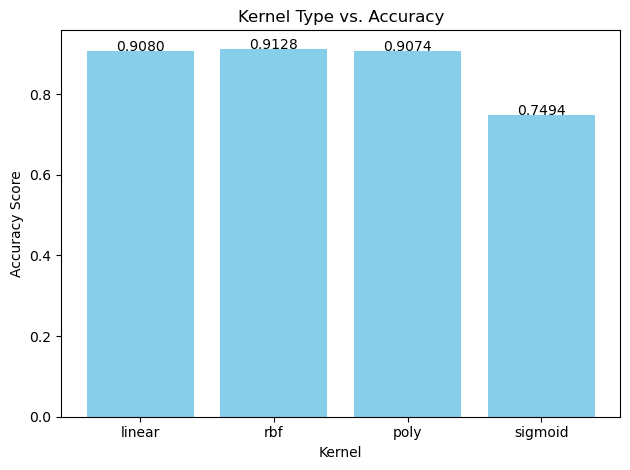

In [16]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
plt.bar(kernels, accuracy_scores, color='skyblue')

plt.title('Kernel Type vs. Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')
# Annotate bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.4f}', ha='center')
plt.tight_layout()
plt.show()

In [17]:
best_index = accuracy_scores.index(max(accuracy_scores))
best_kernel = kernels[best_index]
best_score = accuracy_scores[best_index]
print("Best Kernel Type: ", best_kernel, " Accuracy: ", best_score)

Best Kernel Type:  rbf  Accuracy:  0.9128


### Hyperparameter Tuning
- Since 'sigmoid' kernel underperforms right off the bat we take it off the gridsearch in hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},  # No gamma, degree, coef0 here
    {'kernel': ['rbf'], 'C': [1, 10, 100], 'gamma': [0.1, 0.01, 'scale', 'auto']},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3], 'gamma': ['scale', 'auto'], 'coef0': [0.0, 1.0]},
]
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', n_jobs = -1, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.909225


- Safe to assume 'rbf' is the best kernel. So now we tune only 'rbf' around the C = 100 value.

In [27]:
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [50, 75, 100, 125, 150],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale']
}
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', n_jobs = -1, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy: 0.909225


Even though we did hyperparameter tuning, the best model is still the basic "model2 = SVC(kernel='rbf')" from a couple cells prior.

### Best Model so Far

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

best_model = SVC(kernel='rbf')
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}", "Weighted F1 Score: ", f1) 

Accuracy: 0.9128 Weighted F1 Score:  0.9127919425258147


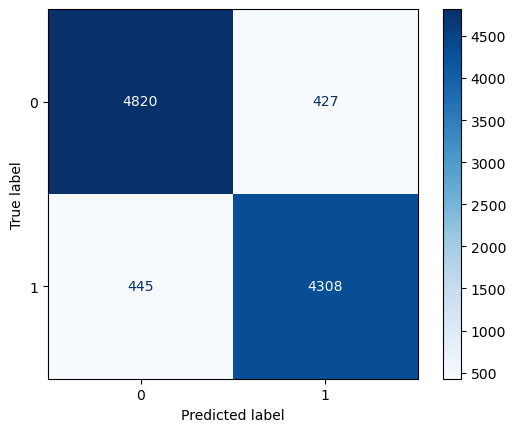

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')